# Understanding the problem statement and business case
* In this hand-on project, we will train 3 Machine Learning algorithms namely Multiple Linear Regression, Random Forest Regression and XGBoost to predict the price of used cars.
* INPUTS(FEATURES): Make, Model, Type, Origin, Drivetrain, Invoice, EngineSize, Cylinders, Horesepower, MPG_City, MPG_Highway, Weight, Wheelbase and Lenght.
* OUTPUT: MSRP (price)
* This project can be used by car dealerships to predict used car prices and understand key factors that contribute to used car prices.

# Libraries/dataset import

In [ ]:
!pip install xgboost
!pip install wordcloud
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

Import dataset from github

In [ ]:
!wget https://raw.githubusercontent.com/VM-137/used-car-price-prediction/main/CARS.csv

--2022-10-13 17:56:42--  https://raw.githubusercontent.com/VM-137/used-car-price-prediction/main/CARS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37716 (37K) [text/plain]
Saving to: ‘CARS.csv.2’

CARS.csv.2          100%[===================>]  36.83K  --.-KB/s    in 0.004s  

2022-10-13 17:56:42 (10.3 MB/s) - ‘CARS.csv.2’ saved [37716/37716]



In [ ]:
car_df = pd.read_csv('/content/CARS.csv')

In [ ]:
car_df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


Display features columns

# Data Preprocessing (1)
* Check features
* Check shape
* Check missing values
* Check data types

### Features

In [ ]:
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

Check the shape and missing values

### Shape

In [ ]:
car_df.shape

(428, 15)

### Missing values

In [ ]:
car_df.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

There are just 2 missing values, we will drop that two rows

In [ ]:
car_df = car_df.dropna()

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


### Data types
* Convert 'MSRP' and 'Invoice' datatype to integer, we need to remove '$' str and comma ',' from these 2 columns

In [ ]:
car_df['MSRP'] = car_df['MSRP'].str.replace('$', '')
car_df['MSRP'] = car_df['MSRP'].str.replace(',', '')
car_df['MSRP'] = car_df['MSRP'].astype(int)
car_df['Invoice'] = car_df['Invoice'].str.replace('$', '')
car_df['Invoice'] = car_df['Invoice'].str.replace(',', '')
car_df['Invoice'] = car_df['Invoice'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
car_df[['MSRP', 'Invoice']].head(10)

,MSRP,Invoice
0,36945,33337
1,23820,21761
2,26990,24647
3,33195,30299
4,43755,39014
5,46100,41100
6,89765,79978
7,25940,23508
8,35940,32506
9,31840,28846


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    int64  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 53.2+ KB


# Exploratory Data Analysis (1)
* Dataset summary
* Scatter plots and histograms
* 'Model' words cloud visualization

### Dataset summary
* Coun, mean, std, min, max of each feature

In [ ]:
car_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,32804.549296,30040.654930,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,19472.460825,17679.430122,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20324.750000,18836.000000,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,27807.500000,25521.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,39225.000000,35754.750000,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [ ]:
print('Maximum price for used car: ', car_df['MSRP'].max())

Maximum price for used car:  192465


In [ ]:
print('Minimum price for used car: ', car_df['MSRP'].min())

Minimum price for used car:  10280


### Visualization

* Scatter plots for relationship and histograms for univariate distributions

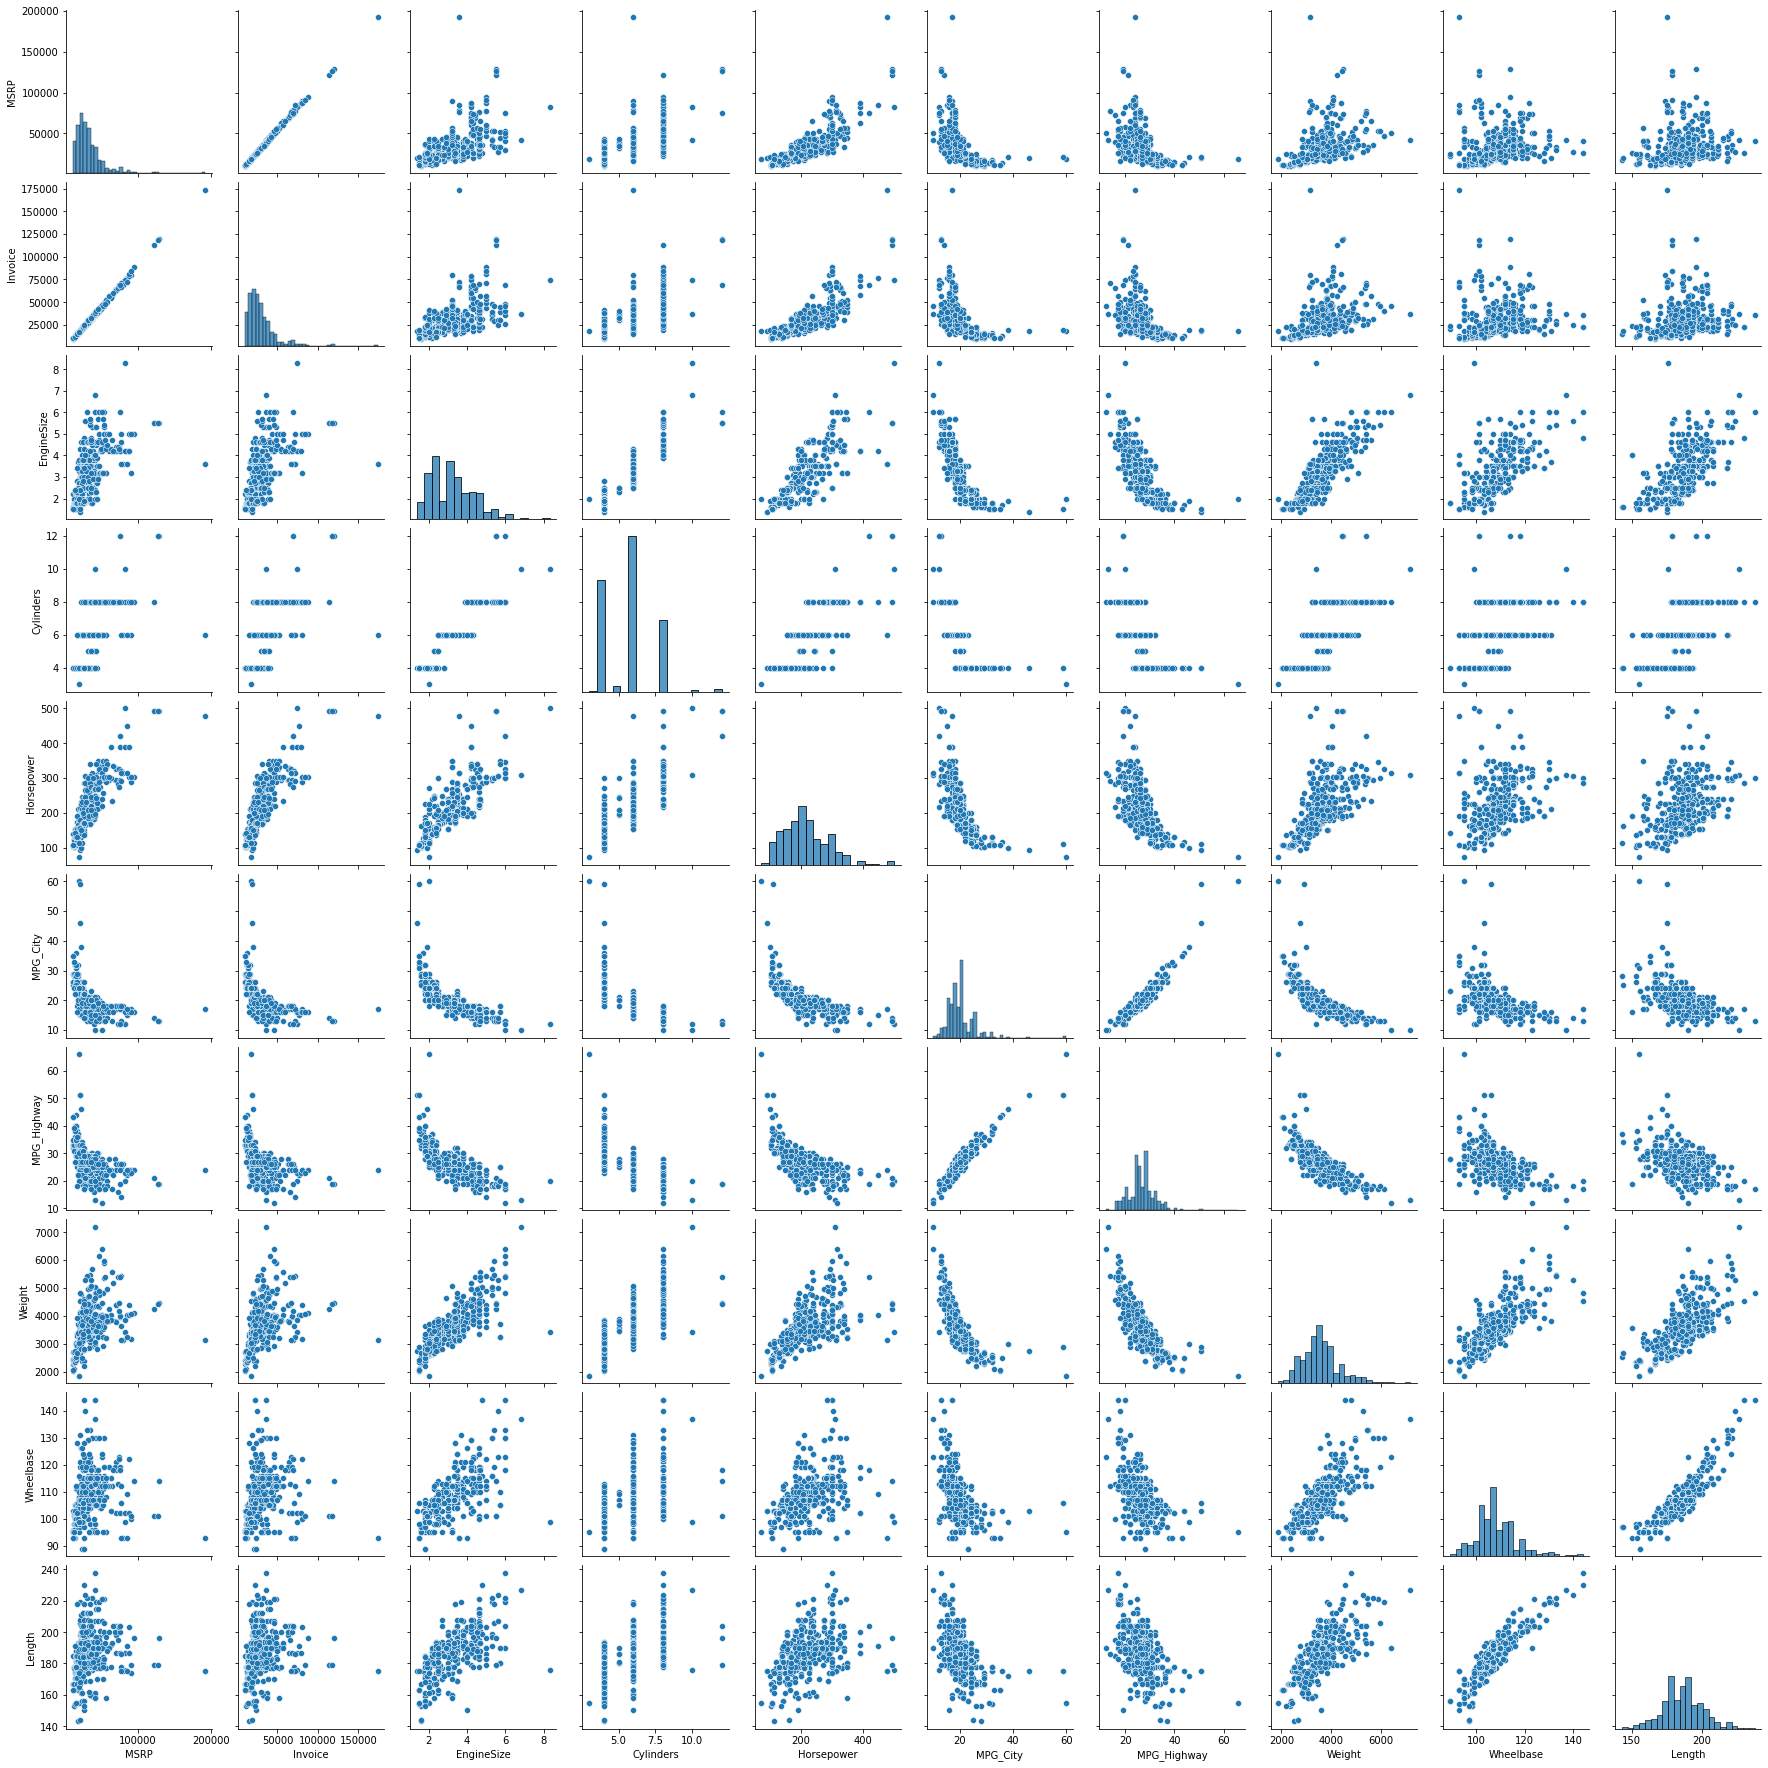

In [ ]:
sns.pairplot(data=car_df)

What's going on?
It seems that there is a linear trend between 'Horsepower' and 'MSRP' (the price), probably it have a direct impact on the price.
We can analyze other features and see that there seems to be an inverse relation between 'MPG_' and 'Horsepower' or 'MPG_'and 'Enginesize' which makes sense as far as we are talking about normal cars.

* Let's view unique makes of the cars

In [ ]:
car_df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [ ]:
fig = px.histogram(car_df, x = 'Make',
                   labels = {'Make': 'Manufacturer'},
                   title = 'Make OF THE CAR',
                   color_discrete_sequence = ['maroon']
                   )
fig.show()

* Let's view various types of cars

In [ ]:
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [ ]:
fig = px.histogram(car_df, x='Type',
                   labels = {'Type':'Type'},
                   title = 'TYPE OF CAR',
                   color_discrete_sequence = ['brown']
                   )
fig.show()

* Let's view the location of the car sales

In [ ]:
car_df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [ ]:
fig = px.histogram(car_df, x='Origin',
                   labels = {'Origin':'Origin'},
                   title = 'LOCATION OF THE CAR SALES',
                   color_discrete_sequence= ['brown']
                   )
fig.show()

* Let's view the drivetrain of the cars

In [ ]:
car_df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [ ]:
fig = px.histogram(car_df, x = 'DriveTrain',
                   labels = {'DriveTrain':'DriveTrain'},
                   title = 'DRIVETRAIN OF THE CAR',
                   color_discrete_sequence = ['BLACK']
                   )
fig.show()

* Plot of the make of the car and its location

In [ ]:
fig = px.histogram(car_df, x = 'Make',
                   color = 'Origin',
                   labels = {'Make':'Manufacturer'},
                   title = 'MAKE OF THE CAR Vs LOCATION'
                   )
fig.show()

* Plot of the make of the car and its type

In [ ]:
fig = px.histogram(car_df, x = 'Make',
                   color = 'Type',
                   labels = {'Make':'Manufacturer'},
                   title = 'MAKE OF THE CAR Vs TYPE'
                   )
fig.show()

* Let's analyze the distribution of words in the 'Model' column using WordCloud generator

In [ ]:
text = car_df['Model'].values
stopwords = set(STOPWORDS)

In [ ]:
wc = WordCloud(background_color='black',
               max_words=2000,
               max_font_size=100,
               random_state=3,
               stopwords=stopwords,
               contour_width=3
               ).generate(str(text))

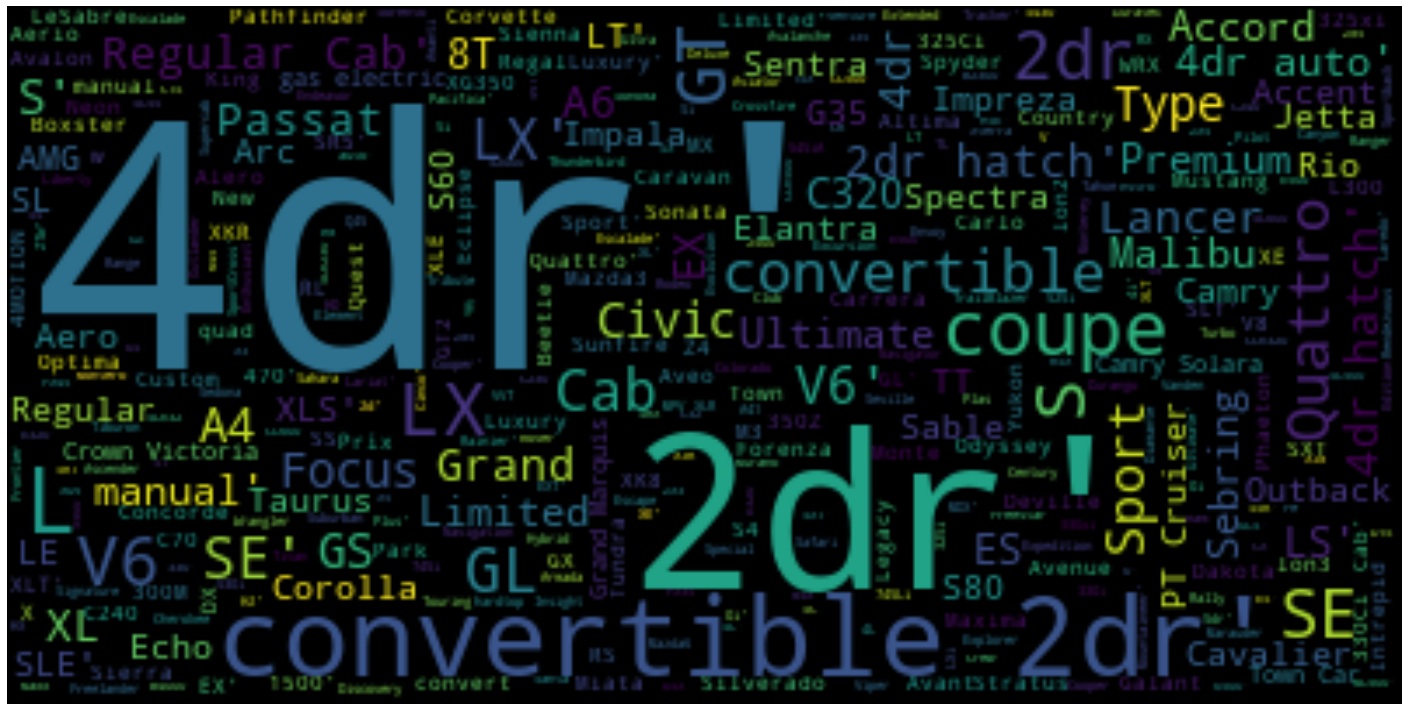

In [ ]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

We can visualize the most common words used in the model name.



* Correlation matrix

In [ ]:
car_df.corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.573238,0.649742,0.827296,-0.475916,-0.440523,0.447987,0.151665,0.171060
Invoice,0.999132,1.000000,0.566019,0.645226,0.824079,-0.471304,-0.435452,0.441916,0.148003,0.165645
EngineSize,0.573238,0.566019,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.827296,0.824079,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.475916,-0.471304,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.440523,-0.435452,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.447987,0.441916,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.151665,0.148003,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.171060,0.165645,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


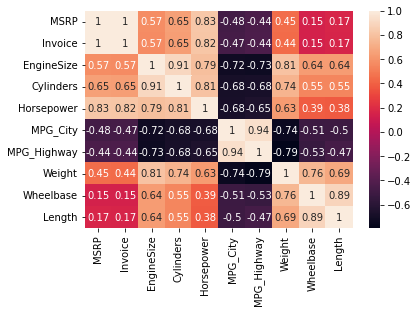

In [ ]:
sns.heatmap(car_df.corr(), annot=True)

We can see that the feature with highest correlation to 'MSRP' seems to be 'Horsepower' with 0.83 as we have suspected, the inverse happens with 'MPG_' and 'Enginesize' with negative (~0.7) correlation.

# Data Preprocessing (2)
* Perform One-Hot Encoding for 'Make', 'Model', 'Type', 'Origin' and 'DriveTrain'
* Drop 'Invoice' column as it does not contribute.
* Split the dataset into Train and Test parts


* One-hot encoding

In [ ]:
df_dum = pd.get_dummies(car_df,
                        columns = ['Make',
                                   'Model',
                                   'Type',
                                   'Origin',
                                   'DriveTrain']
                        )


In [ ]:
df_dum.head(10)

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,...,0,0,0,0,1,0,0,1,0,0
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,...,1,0,0,0,1,0,0,0,1,0
2,26990,24647,2.4,4.0,200,22,29,3230,105,183,...,1,0,0,0,1,0,0,0,1,0
3,33195,30299,3.2,6.0,270,20,28,3575,108,186,...,1,0,0,0,1,0,0,0,1,0
4,43755,39014,3.5,6.0,225,18,24,3880,115,197,...,1,0,0,0,1,0,0,0,1,0
5,46100,41100,3.5,6.0,225,18,24,3893,115,197,...,1,0,0,0,1,0,0,0,1,0
6,89765,79978,3.2,6.0,290,17,24,3153,100,174,...,0,1,0,0,1,0,0,0,0,1
7,25940,23508,1.8,4.0,170,22,31,3252,104,179,...,1,0,0,0,0,1,0,0,1,0
8,35940,32506,1.8,4.0,170,23,30,3638,105,180,...,1,0,0,0,0,1,0,0,1,0
9,31840,28846,3.0,6.0,220,20,28,3462,104,179,...,1,0,0,0,0,1,0,0,1,0


* Drop 'Invoice' column

In [ ]:
df_data = df_dum.drop(columns=['Invoice'], axis=1)

In [ ]:
df_data.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
print('DataFrame shape = ',df_data.shape)

DataFrame shape =  (426, 482)


Split dependent and independent variables

In [ ]:
X = df_data.drop(columns=['MSRP'], axis=1)
y = df_data['MSRP']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print('X Test dataset shape = ', X_train.shape)
print('X Train dataset shape = ', X_test.shape)
print('y Test dataset shape = ', y_train.shape)
print('y Train dataset shape = ', y_test.shape)

X Test dataset shape =  (340, 481)
X Train dataset shape =  (86, 481)
y Test dataset shape =  (340,)
y Train dataset shape =  (86,)


# Model (1)
* Linear Regression

In [ ]:
L_model = LinearRegression()
L_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
accuracy_L_model = L_model.score(X_test, y_test)
print('Score = ', accuracy_L_model)

Score =  0.7961657727464212


# Model (2)
* Decision tree
* Random forest

* Decision Tree

In [ ]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
print('Score Decision Tree = ', accuracy_DecisionTree)

Score Decision Tree =  0.7418232555850557


* Random forest

In [ ]:
RandomForest_model = RandomForestRegressor(n_estimators=5, max_depth=5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [ ]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
print('Score Random Forest = ', accuracy_RandomForest)

Score Random Forest =  0.7962223687276362


# Model (3)
* XGBoost

In [ ]:
model = XGBRegressor(objective ='reg:squarederror',
                     base_score=0.5,
                     learning_rate=0.15
                     )
model.fit(X_train, y_train)

XGBRegressor(learning_rate=0.15, objective='reg:squarederror')

In [ ]:
accuracy_XGBoost = model.score(X_test, y_test)
print('Score XGBoost = ', accuracy_XGBoost)

Score XGBoost =  0.8604044535717625


# Model comparison

* Linear regression

[Text(0, 0.5, 'Actual price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'Linear Regression Model')]

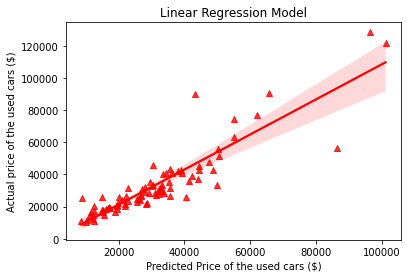

In [ ]:
y_predict_linear = L_model.predict(X_test)
fig = sns.regplot(x=y_predict_linear, y=y_test, color='red', marker='^')
fig.set(title='Linear Regression Model',
        xlabel='Predicted Price of the used cars ($)',
        ylabel = 'Actual price of the used cars ($)'
        )

In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear))))
MSE = mean_squared_error(y_test, y_predict_linear)
MAE = mean_absolute_error(y_test, y_predict_linear)
r2 = r2_score(y_test, y_predict_linear)
print('RMSW =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)

RMSW = 9589.34841045267 
MSE = 91955602.93705118 
MAE = 5733.648078050404 
R2 = 0.7961657727464212


* Random forest

[Text(0, 0.5, 'Actual price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars($)'),
 Text(0.5, 1.0, 'Random Forest Regression Model')]

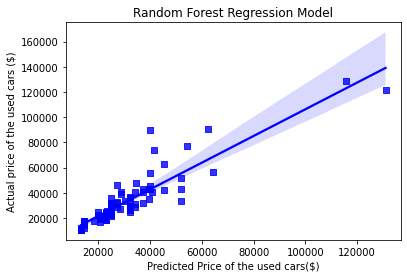

In [ ]:
y_predict_RandomForest = RandomForest_model.predict(X_test)
fig = sns.regplot(x=y_predict_RandomForest, y=y_test, color='blue', marker='s')
fig.set(title='Random Forest Regression Model',
        xlabel='Predicted Price of the used cars($)',
        ylabel = 'Actual price of the used cars ($)'
        )

In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest))))
MSE = mean_squared_error(y_test, y_predict_RandomForest)
MAE = mean_absolute_error(y_test, y_predict_RandomForest)
r2 = r2_score(y_test, y_predict_RandomForest)
print('RMSW =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)

RMSW = 9588.017043617383 
MSE = 91930070.82869743 
MAE = 5796.789135124738 
R2 = 0.7962223687276362


* XGBoost

[Text(0, 0.5, 'Actual price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars($)'),
 Text(0.5, 1.0, 'XGBoost Model')]

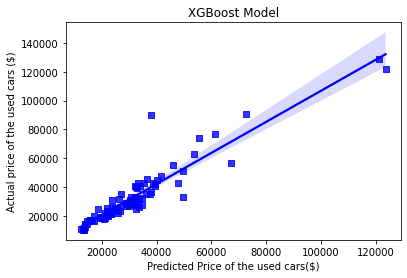

In [ ]:
y_predict_XGBoost = model.predict(X_test)
fig = sns.regplot(x=y_predict_XGBoost, y=y_test, color='blue', marker='s')
fig.set(title='XGBoost Model',
        xlabel='Predicted Price of the used cars($)',
        ylabel = 'Actual price of the used cars ($)'
        )

In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost))))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)
print('RMSW =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)

RMSW = 7935.719781944169 
MSE = 62975648.457540005 
MAE = 4459.150935683139 
R2 = 0.8604044535717625
